# Set up enviroment

In [1]:
# train:test 9:1 8:2 7:3
TEST_RATIO = 0.3
TRAIN_TEST_LABEL = f'{int(10-TEST_RATIO*10)}-{int(TEST_RATIO*10)}'
DATASET_NAME = 'VCB'
MODEL_NAME = 'LinearRegression'

In [2]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# Start

In [4]:
from sklearn.linear_model import LinearRegression

def buildModel():
  model = LinearRegression()
  return model

## Reading dataset

In [5]:
# dataset_path = '/content/drive/MyDrive/UIT/IS403/Source_Code_PTDLKD/Data Train 1-3-2019 1-3-2024/BIDV.csv'
df = pd.read_csv(f'{DATASET_NAME}.csv', index_col="Date")


In [6]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-01 00:00:00+07:00,40478.95313,41275.25781,40346.23438,41275.25781,1225908
2019-03-04 00:00:00+07:00,41275.25781,41806.13281,41275.25781,41673.41406,2030592
2019-03-05 00:00:00+07:00,41673.41406,42337.00391,41474.33594,41806.13281,2376092
2019-03-06 00:00:00+07:00,41872.48828,42005.20703,41076.18359,41607.05469,2107101
2019-03-07 00:00:00+07:00,41607.05469,42337.00391,41540.69531,41872.48828,3091640
2019-03-08 00:00:00+07:00,41407.97656,41806.13281,41208.90234,41673.41406,1502992
2019-03-11 00:00:00+07:00,41407.97656,41607.05469,41076.18359,41540.69531,2149189
2019-03-12 00:00:00+07:00,41806.13281,43000.59375,41607.05469,43000.59375,3397250
2019-03-13 00:00:00+07:00,43133.30859,43266.02734,42801.51563,43266.02734,2682908


In [7]:
print(f"Data shape: {df.shape}")

Data shape: (1306, 5)


## Data preprocessing

### Checking duplicates and null values

In [8]:
print("Duplicated")
df.duplicated().sum()

Duplicated


0

In [9]:
print("Null")
df.isnull().sum()

Null


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Checking DataFrame information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 2019-03-01 00:00:00+07:00 to 2024-05-31 00:00:00+07:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1306 non-null   float64
 1   High    1306 non-null   float64
 2   Low     1306 non-null   float64
 3   Close   1306 non-null   float64
 4   Volume  1306 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 61.2+ KB


### Overview Data Descriptive statistic

In [11]:
df.describe()

,Open,High,Low,Close,Volume
count,1306.000000,1306.000000,1306.000000,1306.000000,1.306000e+03
mean,66632.287625,67376.869907,65893.990794,66674.472992,1.749315e+06
std,13650.638359,13709.120368,13537.991191,13618.837973,1.424309e+06
min,37957.312500,38753.621090,37559.160160,37957.312500,3.044610e+05
25%,56736.890630,57151.636722,56206.019530,56604.175780,1.055342e+06
50%,65214.910160,65927.601565,64434.527340,65164.476560,1.462575e+06
75%,75359.867190,76286.236327,74640.132812,75508.042970,2.096924e+06
max,98500.000000,100500.000000,97300.000000,97400.000000,3.407681e+07


## Linear Regression Model

### Split Data

In [12]:
df.reset_index(inplace=True)

features = df.index
target = df['Close']

def splitTrainTest(test_ratio):
    n_observations = len(df)

    train_size = int((1-test_ratio) * n_observations)
    test_size = n_observations - train_size

    x_train, x_test = (
        np.array(features[:train_size]).reshape(-1, 1),
        np.array(features[train_size:train_size + test_size]).reshape(-1, 1)
    )
    y_train, y_test = target[:train_size], target[train_size:train_size + test_size]

    return x_train, x_test, y_train, y_test

In [13]:
colors = plt.get_cmap('tab10').colors

In [14]:
def allResultPlots(data):
    (x_train, y_train, x_test, y_test, y_pred, x_next_90_days, y_next_90_days) = data

    figname = f'{DATASET_NAME} {TRAIN_TEST_LABEL}'
    plt.title(figname)
    plt.xlabel('Index')
    plt.ylabel('Price')

    # train
    plt.plot(x_train, y_train, color=colors[0])

    # test
    plt.plot(x_test, y_test, color=colors[1])
    plt.plot(x_test, y_pred, color=colors[2])

    # next 90 Days
    # plt.plot(x_next_90_days, y_next_90_days)
    plt.plot(x_next_90_days[0:30],y_next_90_days[0:30], color=colors[3])
    plt.plot(x_next_90_days[30:60],y_next_90_days[30:60], color=colors[4])
    plt.plot(x_next_90_days[60:90],y_next_90_days[60:90], color=colors[5])

    # save plots and show
    plt.legend(['Train', 'Test', 'Predictions (Test)','Predictions (Next30Days)','Predictions (Next60Days)','Predictions (Next90Days)'])
    
    plot_dir = "plots/result"
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    figname = f'{DATASET_NAME}_{MODEL_NAME}_{TRAIN_TEST_LABEL}'
    plt.savefig(os.path.join(plot_dir, figname + ".png"), bbox_inches='tight')

    plt.show()

In [15]:
def next90DaysPlot(data):
    (x_next_90_days, y_next_90_days) = data

    plt.title("Next 90 Days")
    # plt.plot(x_next_90_days, y_next_90_days)
    plt.plot(x_next_90_days[0:30],y_next_90_days[0:30], color=colors[3])
    plt.plot(x_next_90_days[30:60],y_next_90_days[30:60], color=colors[4])
    plt.plot(x_next_90_days[60:90],y_next_90_days[60:90], color=colors[5])

    # save plots and show
    plt.legend(['Predictions (Next30Days)','Predictions (Next60Days)','Predictions (Next90Days)'])
    # Ensure the directory exists
    plot_dir = "plots/predicted"
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    
    figname = f'{DATASET_NAME}_{MODEL_NAME}_{TRAIN_TEST_LABEL}_90Days'
    plt.savefig(os.path.join(plot_dir, figname + ".png"), bbox_inches='tight')
    
    plt.show()

In [16]:
def evaluateAccuracy(y_test, y_pred):
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    print('Testing MAPE:', test_mape)

    test_mae = np.mean(abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

In [17]:
print("==============================")
print('Test Ratio: ', TEST_RATIO)

#====Start-Linear-Regression-model====#
# split train test by test_ratio
x_train, x_test, y_train, y_test= splitTrainTest(TEST_RATIO)

print("Train: ", x_train.shape)
print("Test: ", x_test.shape)

# create linear regression model
model = buildModel()
model.fit(x_train, y_train)

# make prediction
y_pred = model.predict(x_test)

# compare actual and predicted price
comparison_data = {'Actual_Price':y_test, 'Predicted_Price':y_pred}
comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

# evaluate accuracy
evaluateAccuracy(y_test, y_pred)
#====End-Linear-Regression-model====#



#====Start-Predick-next-90-days====#
print("==============================")
last_index =  df.index[-1]
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)
print("Next 90 Days:")
print(y_next_90_days)
#====End-Predick-next-90-days====#

Test Ratio:  0.3
Train:  (914, 1)
Test:  (392, 1)
      Actual_Price  Predicted_Price
914    57578.32422     71476.658742
915    59187.12891     71502.159733
916    59271.80469     71527.660723
917    60711.26172     71553.161714
918    60626.58594     71578.662705
...            ...              ...
1301   90200.00000     81345.542203
1302   90700.00000     81371.043194
1303   89800.00000     81396.544184
1304   88600.00000     81422.045175
1305   87200.00000     81447.546166

[392 rows x 2 columns]
Testing RMSE: 9193.289605303415
Testing MAPE: 0.09708747260502333
Testing MAE: 8187.251928280558
Next 90 Days:
[81473.04715706 81498.54814791 81524.04913877 81549.55012963
 81575.05112048 81600.55211134 81626.05310219 81651.55409305
 81677.0550839  81702.55607476 81728.05706561 81753.55805647
 81779.05904733 81804.56003818 81830.06102904 81855.56201989
 81881.06301075 81906.5640016  81932.06499246 81957.56598332
 81983.06697417 82008.56796503 82034.06895588 82059.56994674
 82085.07093759 8

All Result


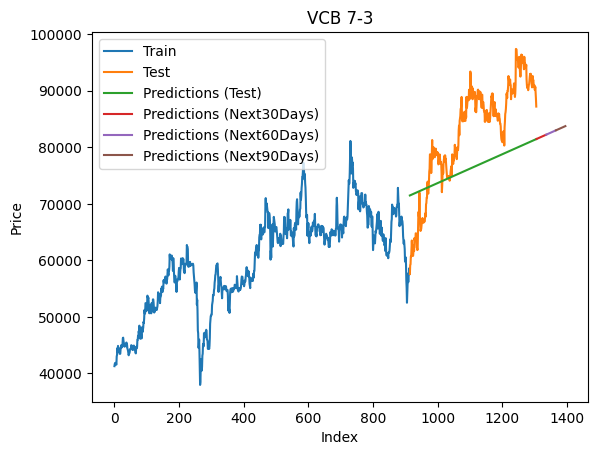

Next 90 days prediction


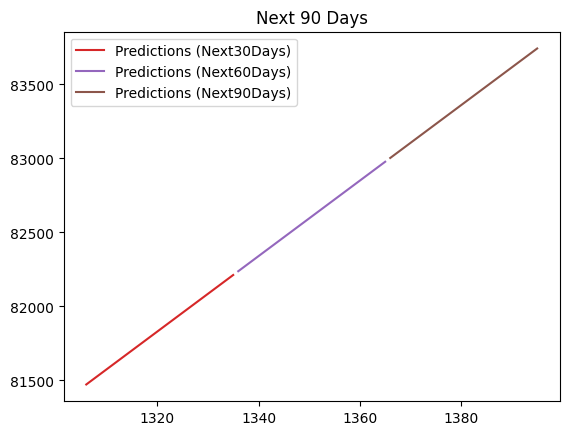

In [18]:
# use plots to display data
# all
print('All Result')
allResultPlots((x_train , y_train, x_test, y_test, y_pred, x_next_90_days, y_next_90_days))
# next 90 Days
print('Next 90 days prediction')
next90DaysPlot((x_next_90_days, y_next_90_days))